<a href="https://colab.research.google.com/github/SanjanaPurohit2000/116_SanjanaPurohit/blob/master/Lab8/116_Lab8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim :** To implement K-Means clustering using scikit-learn library for unlabeled and labeled data.

**Excercise:** Write a python program to perform K-Means clustering on Breast Cancer Data

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Prepare Data**

In [2]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


**K-Mean Model**

In [3]:
kmeans = KMeans(n_clusters=10, random_state=116)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[4 4 0 9 0 1 0 1 1 1 5 7 7 5 1 5 5 7 8 1 9 3 5 8 4 7 5 7 7 7 0 1 7 4 7 7 1
 9 1 1 1 9 0 1 1 0 3 1 9 1 9 1 9 7 5 9 4 5 9 3 3 3 5 3 1 5 3 9 3 9 4 3 0 1
 9 7 9 0 0 9 9 9 2 7 9 0 1 0 9 1 1 1 1 1 5 0 9 3 9 1 1 3 9 3 3 1 9 9 8 9 3
 9 1 3 3 9 3 5 7 7 9 0 8 1 9 1 1 0 1 0 9 5 7 5 0 9 9 9 5 3 3 7 9 9 3 9 9 1
 1 1 9 3 3 3 1 9 7 5 9 9 9 0 4 9 8 1 3 7 0 1 9 5 5 3 3 3 3 5 9 9 2 4 7 9 5
 3 7 9 9 9 1 9 3 1 1 9 1 7 0 5 9 7 4 5 9 5 3 7 9 5 0 9 2 5 1 1 9 3 4 8 1 1
 3 5 1 1 3 1 9 1 7 9 9 4 3 1 2 0 1 7 1 9 9 1 0 3 9 9 3 9 4 9 4 7 4 1 4 5 7
 5 4 7 7 5 7 2 3 1 9 3 1 9 8 3 7 9 9 7 1 1 0 9 0 5 9 9 9 9 3 9 1 1 9 9 9 1
 3 9 1 3 4 9 0 3 9 9 9 3 1 1 9 1 9 9 3 9 9 0 3 9 3 0 9 4 9 9 1 9 5 5 5 9 3
 9 9 7 9 4 3 2 1 3 3 0 9 3 9 5 9 9 9 5 2 5 9 9 9 1 3 3 9 9 9 5 1 4 0 9 2 8
 7 1 0 4 1 5 3 1 1 9 9 3 9 9 9 1 9 1 9 7 3 3 7 4 9 1 1 9 9 9 7 9 9 9 9 9 5
 9 7 9 9 9 3 5 5 9 3 0 9 9 9 1 9 1 3 3 3 9 3 9 1 9 0 0 1 1 9 1 1 1 9 7 1 3
 7 9 7 1 1 4 9 0 9 1 9 1 9 9 9 3 0 6 1 9 1 1 1 3 7 9 3 9 5 9 3 9 1 1 9 5 9
 1 1 1 5 9 1 0 9 5 9 7 7 

**Scatter plot of the data points**

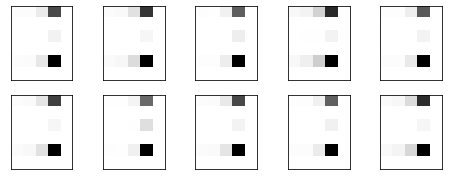

In [4]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [5]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9068541300527241

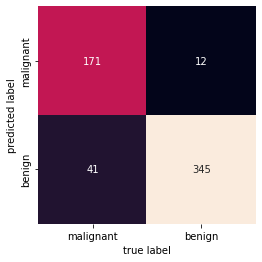

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');